In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

experimentName = "combined_heuristic_convolution"
with open("results/{}.pkl".format(experimentName), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    
    df = pd.DataFrame(results)

experimentName = "combined_heuristic_convolution_nopriority"
with open("results/{}.pkl".format(experimentName), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    
    df1 = pd.DataFrame(results)

experimentName = "combined_heuristic_convolution_dqn"
with open("results/{}.pkl".format(experimentName), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    
    df2 = pd.DataFrame(results)

def load_df(fileName, grouping = None):
    with open("results/{}.pkl".format(fileName), 'rb') as resultsFile:
        results = pickle.load(resultsFile)
        df_temp = pd.DataFrame(results)
        if grouping:
            df_temp = df_temp.groupby((df_temp['episode']) // grouping)
        
        return df_temp

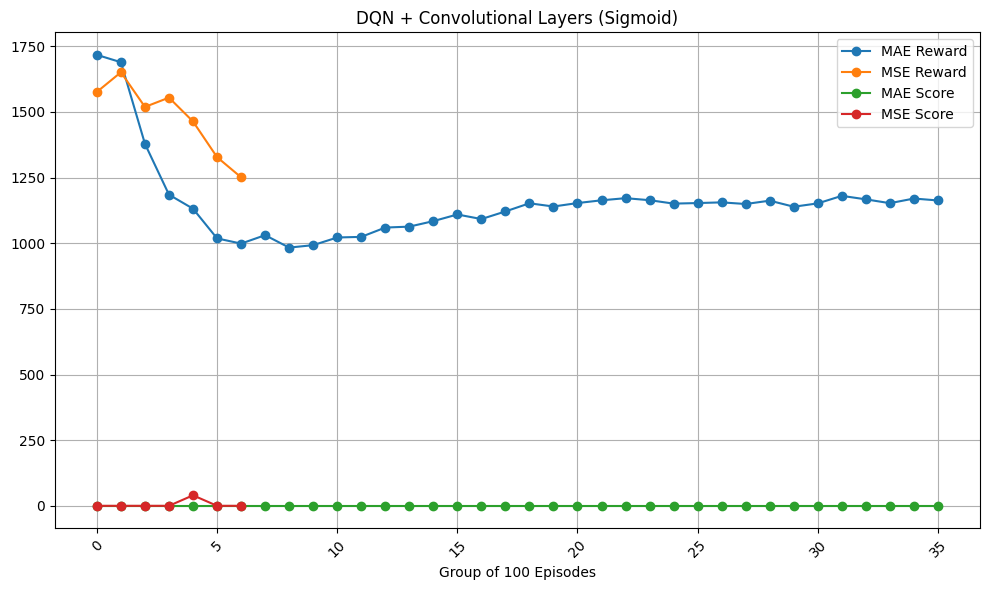

In [44]:
grouped = load_df("conv_sigmoid_rescaled_mae", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

grouped1 = load_df("conv_sigmoid_rescaled_mse", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='MAE Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='MSE Reward')
sum_score.plot(marker='o', linestyle='-', label='MAE Score')
sum_score1.plot(marker='o', linestyle='-', label='MSE Score')
plt.title('DQN + Convolutional Layers (Sigmoid)')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


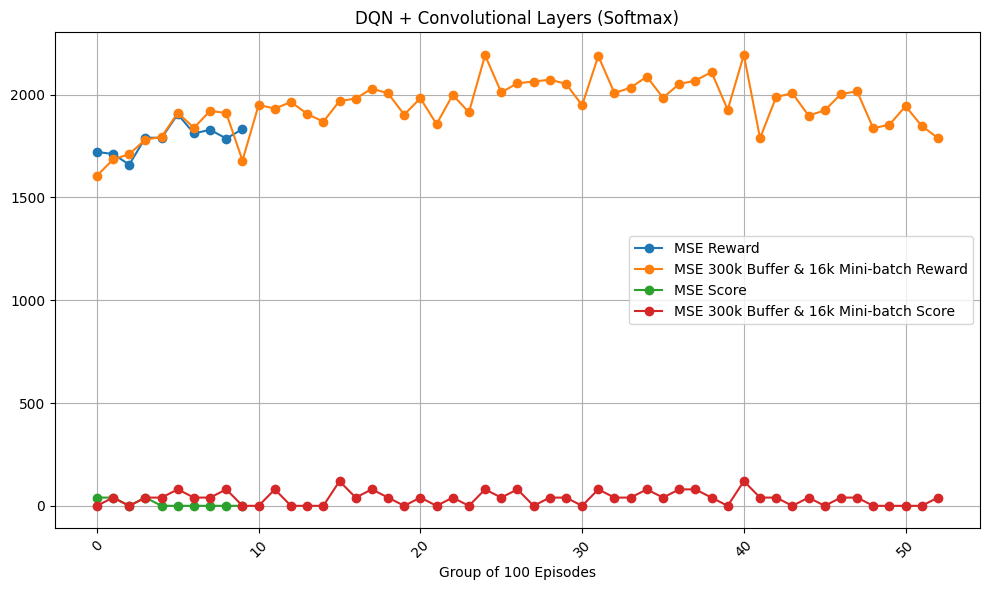

In [46]:
grouped = load_df("rescale_linearconv_leakyrelu_softmax_mse", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

grouped1 = load_df("rescale_linearconv_leakyrelu_softmax_mse_300kmem_16kbatch", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='MSE Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='MSE 300k Buffer & 16k Mini-batch Reward')
sum_score.plot(marker='o', linestyle='-', label='MSE Score')
sum_score1.plot(marker='o', linestyle='-', label='MSE 300k Buffer & 16k Mini-batch Score')
plt.title('DQN + Convolutional Layers (Softmax)')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

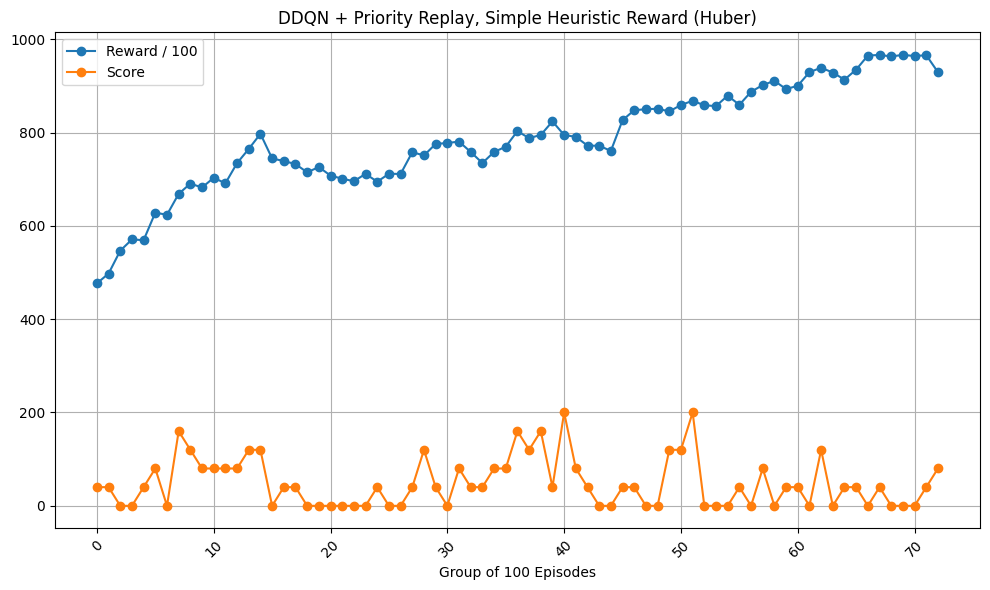

In [48]:
grouped = load_df("priority_smartreward_DDQN_huber", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1] / 100
sum_score = grouped['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Reward / 100')
sum_score.plot(marker='o', linestyle='-', label='Score')
plt.title('DDQN + Priority Replay, Simple Heuristic Reward (Huber)')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

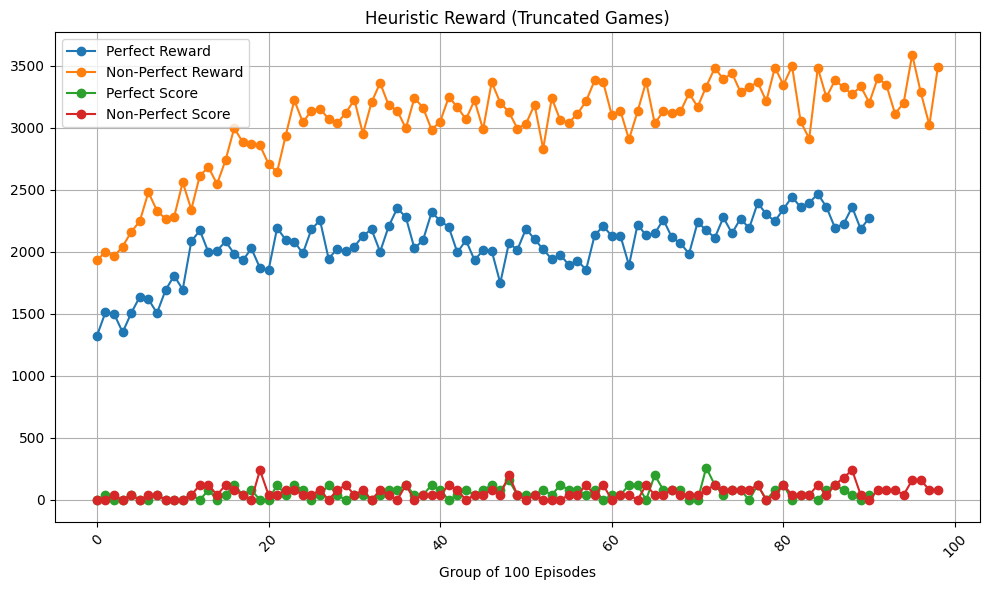

In [132]:
grouped = load_df("rescaleboard_truncated_priority_simulatedheuristicreward_DDQN_nextpiecescore_convdoubleleakyrelu_dense512_dense64_huber_64batch", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

grouped1 = load_df("rescaleboard_truncated_priority_simulatednonperfectheuristicreward_DDQN_nextpiecescore_convtripleelu_dense512relu_dense64_huber_256batch", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Perfect Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='Non-Perfect Reward')
sum_score.plot(marker='o', linestyle='-', label='Perfect Score')
sum_score1.plot(marker='o', linestyle='-', label='Non-Perfect Score')
plt.title('Heuristic Reward (Truncated Games)')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

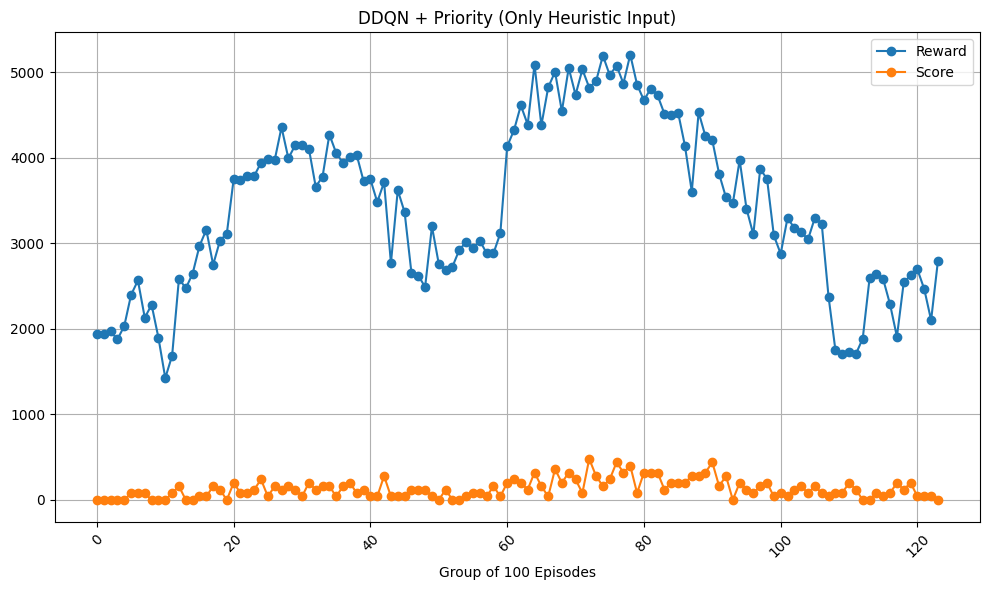

In [80]:
grouped = load_df("correctedpos_priority_simulatednonperfectheuristicreward_DDQN_simpleinput_dense256relu_dense256relu_dense128relu_huber_256batch_pretrain", 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['total_lines_cleared'].sum().iloc[:-1] * 40

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Reward')
sum_score.plot(marker='o', linestyle='-', label='Score')
plt.title('DDQN + Priority (Only Heuristic Input)')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

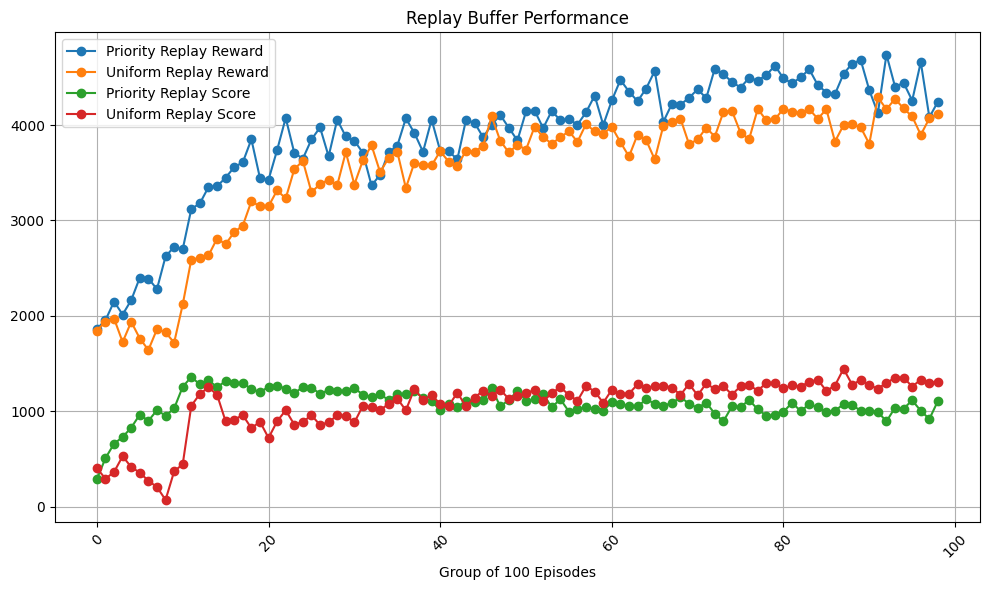

In [119]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Priority Replay Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='Uniform Replay Reward')
sum_score.plot(marker='o', linestyle='-', label='Priority Replay Score')
sum_score1.plot(marker='o', linestyle='-', label='Uniform Replay Score')
plt.title('Replay Buffer Performance')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

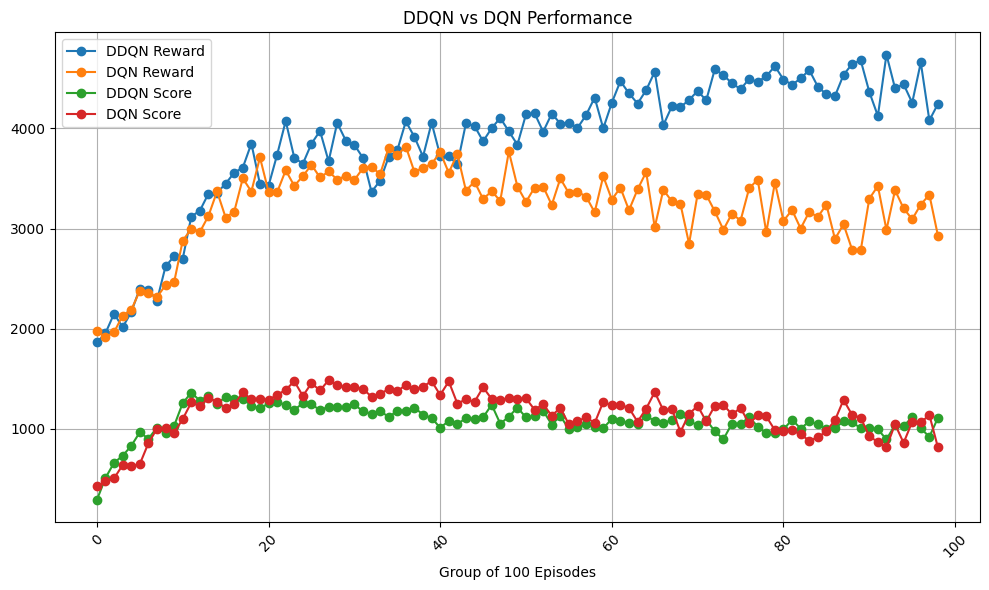

In [120]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df2.groupby((df2['episode']) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped['total_reward'].sum().iloc[:-1]
sum_score = grouped['score'].sum().iloc[:-1]

sum_rewards1 = grouped1['total_reward'].sum().iloc[:-1]
sum_score1 = grouped1['score'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='DDQN Reward')
sum_rewards1.plot(marker='o', linestyle='-', label='DQN Reward')
sum_score.plot(marker='o', linestyle='-', label='DDQN Score')
sum_score1.plot(marker='o', linestyle='-', label='DQN Score')
plt.title('DDQN vs DQN Performance')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

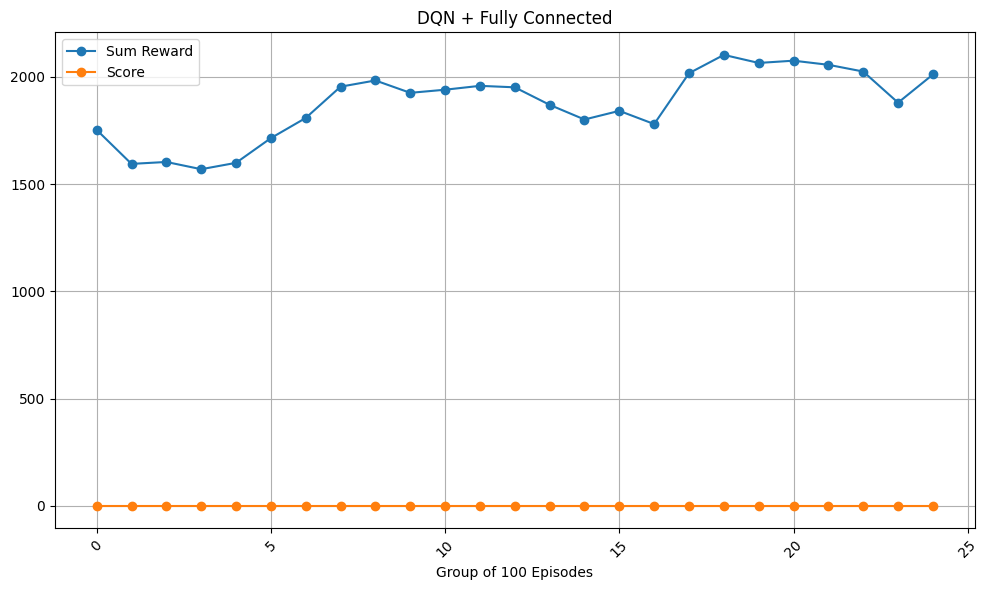

In [52]:
with open("results/{}.pkl".format("pieces_2532"), 'rb') as resultsFile:
    results = pickle.load(resultsFile)
    df_temp = pd.DataFrame(results)

# Group the DataFrame by every 100 episodes
grouped = df_temp.groupby((df_temp[1]) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_rewards = grouped[2].sum().iloc[:-1]
sum_score = grouped[5].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_rewards.plot(marker='o', linestyle='-', label='Sum Reward')
sum_score.plot(marker='o', linestyle='-', label='Score')
plt.title('DQN + Fully Connected')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

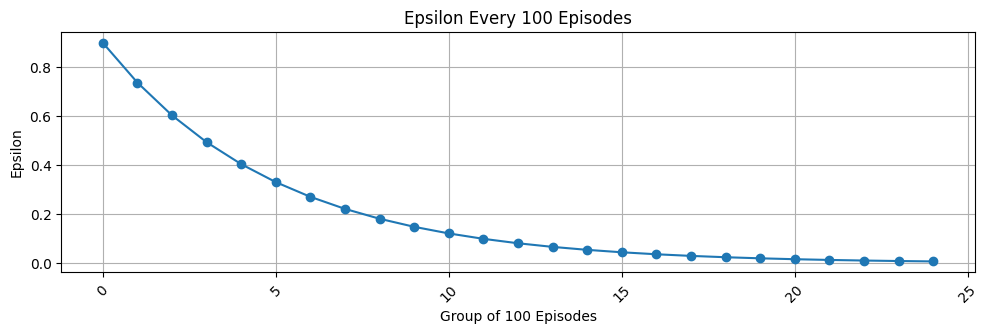

In [114]:
# Group the DataFrame by every 50 episodes
grouped = df.groupby((df['episode']) // 100)

# Calculate the sum of total lines cleared and mean epsilon for every 50 episodes
sum_lines_cleared = grouped['total_lines_cleared'].sum().head(25)
mean_epsilon = grouped['epsilon'].mean().head(25)

# Plotting
plt.figure(figsize=(10, 6))

# Plot epsilon
plt.subplot(2, 1, 2)
mean_epsilon.plot(marker='o', linestyle='-')
plt.title('Epsilon Every 100 Episodes')
plt.xlabel('Group of 100 Episodes')
plt.ylabel('Epsilon')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

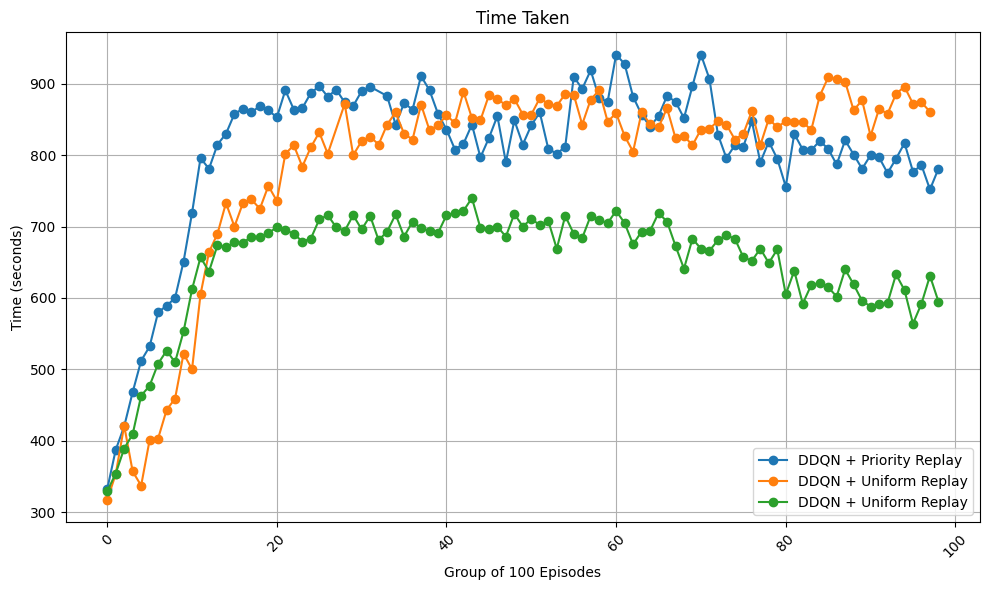

In [120]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)
grouped2 = df2.groupby((df2['episode']) // 100)

# Calculate the time taken for every 100 episodes
time_taken = (grouped['timestamp'].max() - grouped['timestamp'].min().iloc[:-1]).astype('timedelta64[s]')
time_taken1 = (grouped1['timestamp'].max() - grouped1['timestamp'].min().iloc[:-1]).astype('timedelta64[s]')
time_taken2 = (grouped2['timestamp'].max() - grouped2['timestamp'].min().iloc[:-1]).astype('timedelta64[s]')

# Compute mean time difference and 5 times the average time difference
dev = time_taken.std()
threshold = 10.5 * dev

# Filter out groups where the mean difference exceeds 5 times the average time difference
filtered_grouped = time_taken[time_taken <= threshold]
filtered_grouped1 = time_taken1[time_taken1 <= threshold]
filtered_grouped2 = time_taken2[time_taken2 <= threshold]

# Plotting
plt.figure(figsize=(10, 6))
filtered_grouped.plot(marker='o', linestyle='-', label='DDQN + Priority Replay')
filtered_grouped1.plot(marker='o', linestyle='-', label='DDQN + Uniform Replay')
filtered_grouped2.plot(marker='o', linestyle='-', label='DDQN + Uniform Replay')
plt.title('Time Taken')
plt.xlabel('Group of 100 Episodes')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

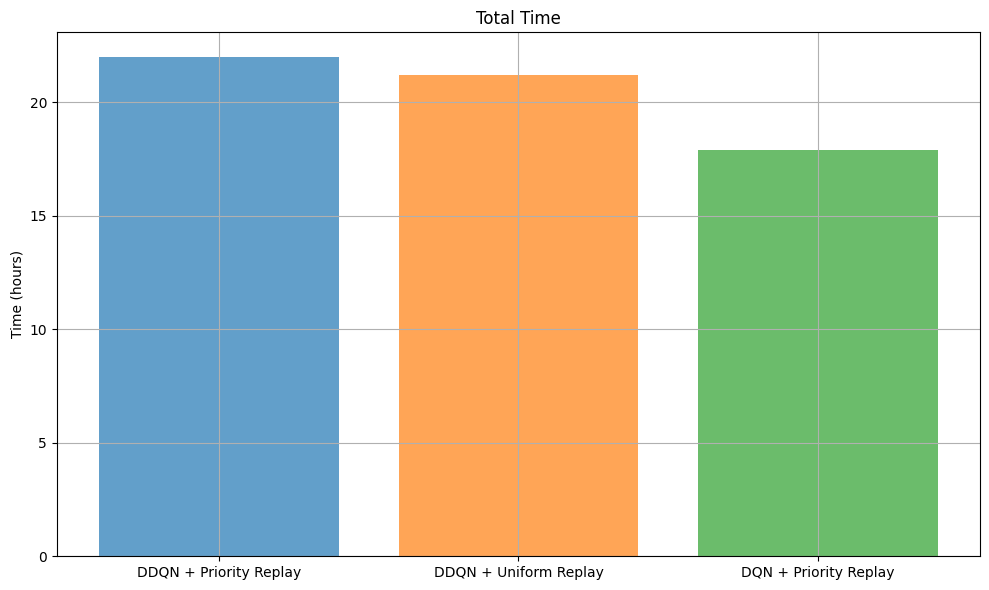

In [131]:
import matplotlib.pyplot as plt

# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)

# Calculate the time taken for every 100 episodes
time_taken = (grouped['timestamp'].max() - grouped['timestamp'].min().iloc[:-1])
time_taken1 = (grouped1['timestamp'].max() - grouped1['timestamp'].min().iloc[:-1])
time_taken2 = (grouped2['timestamp'].max() - grouped2['timestamp'].min().iloc[:-1])

# Compute mean time difference and 5 times the average time difference
dev = time_taken.std()
threshold = 10.5 * dev

# Filter out groups where the mean difference exceeds 5 times the average time difference
filtered_grouped = time_taken[time_taken <= threshold].dt.total_seconds().sum() / 60 / 60
filtered_grouped1 = time_taken1[time_taken1 <= threshold].dt.total_seconds().sum() / 60 / 60
filtered_grouped2 = time_taken2[time_taken2 <= threshold].dt.total_seconds().sum() / 60 / 60

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['DDQN + Priority Replay'], [filtered_grouped], align='center', alpha=0.7)
plt.bar(['DDQN + Uniform Replay'], [filtered_grouped1], align='center', alpha=0.7)
plt.bar(['DQN + Priority Replay'], [filtered_grouped2], align='center', alpha=0.7)
plt.title('Total Time')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.tight_layout()
plt.show()


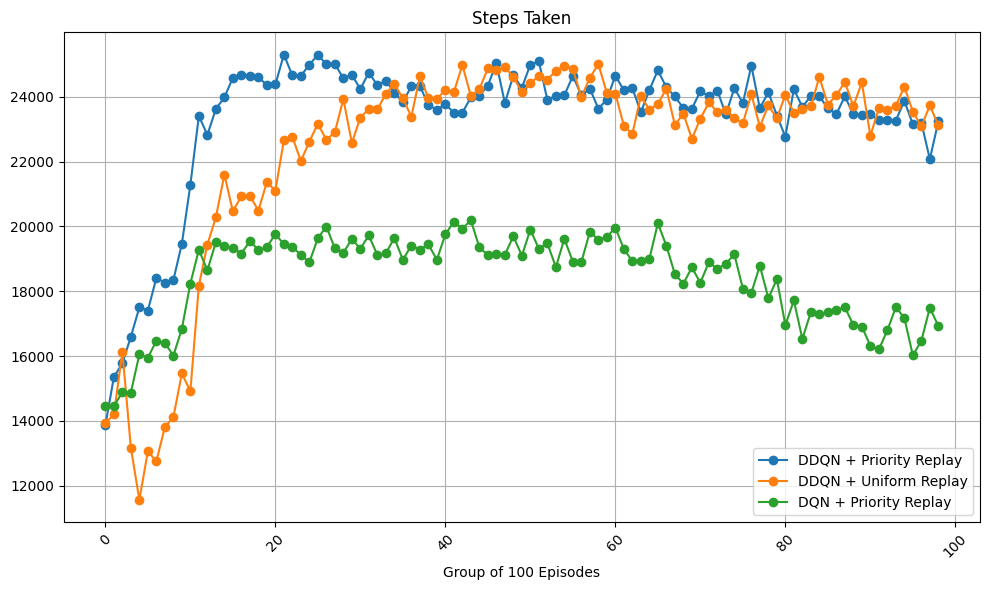

In [86]:
# Group the DataFrame by every 100 episodes
grouped = df.groupby((df['episode']) // 100)
grouped1 = df1.groupby((df1['episode']) // 100)
grouped2 = df2.groupby((df2['episode']) // 100)

# Calculate the sum of total rewards for every 100 episodes
sum_steps = grouped['steps'].sum().iloc[:-1]
sum_steps1 = grouped1['steps'].sum().iloc[:-1]
sum_steps2 = grouped2['steps'].sum().iloc[:-1]

# Plotting
plt.figure(figsize=(10, 6))
sum_steps.plot(marker='o', linestyle='-', label='DDQN + Priority Replay')
sum_steps1.plot(marker='o', linestyle='-', label='DDQN + Uniform Replay')
sum_steps2.plot(marker='o', linestyle='-', label='DQN + Priority Replay')
plt.title('Steps Taken')
plt.xlabel('Group of 100 Episodes')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

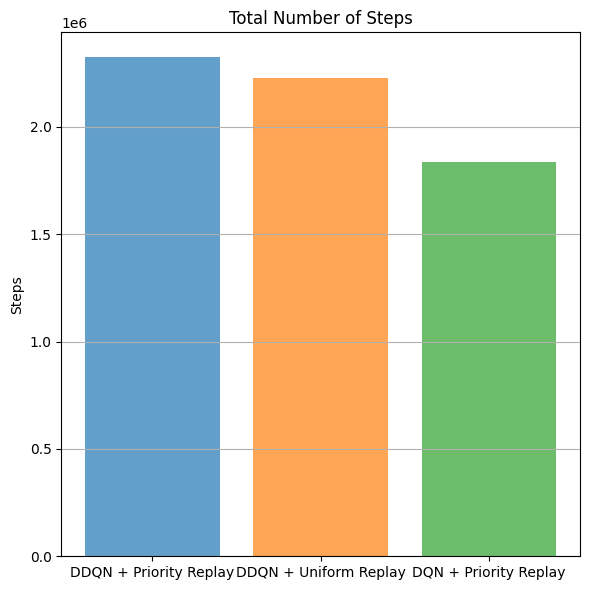

In [89]:
# Calculate the total steps across all episodes
total_steps = df['steps'].sum()
total_steps1 = df1['steps'].sum()
total_steps2 = df2['steps'].sum()

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(['DDQN + Priority Replay'], [total_steps], align='center', alpha=0.7)
plt.bar(['DDQN + Uniform Replay'], [total_steps1], align='center', alpha=0.7)
plt.bar(['DQN + Priority Replay'], [total_steps2], align='center', alpha=0.7)
plt.title('Total Number of Steps')
plt.ylabel('Steps')
plt.grid(axis='y')
plt.tight_layout()
plt.show()